# **Effects of anthropogenic stressors on macroinvertebrate communities in Neotropical streams of Argentinian Center-Eastern**


## *Required packages*

In [ ]:
#install.packages("ggplot2")
#install.packages("tidyverse")
#install.packages("pwr")
#install.packages("ggpubr")
#install.packages("permute")
#install.packages("lattice")
#install.packages("ggrepel")
#install.packages("vegan")
#install.packages("FactoMineR")
#install.packages("factoextra")
#install.packages("dendextend")

In [ ]:
require(ggplot2)
require(tidyverse)
require(pwr)
require(ggpubr)
require(permute)
require(lattice)
require(ggrepel)
require(vegan)
require(FactoMineR)
require(factoextra)
require(dendextend)

## *Univariate analysis*
###Boxplot- richness, and abundances per surface per stream

In [ ]:
riq_ab<- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSZuTAHeOBvLUd84lJmoiveOLm3YopCWvJAVyrk7imIOfddul_yTEiMx5FXYuvCow/pub?gid=296864564&single=true&output=csv",
          header=TRUE, sep=",", encoding = "Unicode", dec = ",")

riq_ab$stream <- factor(riq_ab$stream, levels = c("SBS","LPS","LCS","GAS","ECS","LCAS","EZS","EMS"))

riq_ab$abundance <- as.integer(riq_ab$abundance)

In [ ]:
riqueza <- ggplot(data=riq_ab,aes(x=stream, y=richness, color=stream, fill=stream)) +
  geom_boxplot(outlier.colour = "black",outlier.alpha = 0.5,
               fill=c("green4","green4","green4","green4","orange","orange","red","red"),
               colour=c("green4","green4","green4","green4","orange","orange","red","red"),
               alpha = c(0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5))+
  geom_jitter(width=0.15, alpha=0.5, colour="black")+
  labs(y= "Richness")+
  theme(legend.position = "none") +scale_y_continuous(limit = c(0,35))+
  theme(axis.title.x=element_blank())+
  theme(axis.ticks.x=element_blank())+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"))

In [ ]:
abundancia <- ggplot(data=riq_ab,aes(x=stream, y=abundance, color=stream, fill=stream)) +
  geom_boxplot(outlier.colour = "black",outlier.alpha = 0.5,
               fill=c("green4","green4","green4","green4","orange","orange","red","red"),
               colour=c("green4","green4","green4","green4","orange","orange","red","red"),
               alpha = c(0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5))+
  geom_jitter(width=0.15, alpha=0.5, colour="black")+
  labs(y=bquote('Abundance'~(ind/m^2)))+
  theme(legend.position = "none") +scale_y_continuous(limit = c(0,4000))+
  theme(axis.title.x=element_blank())+
  theme(axis.ticks.x=element_blank())+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"))

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


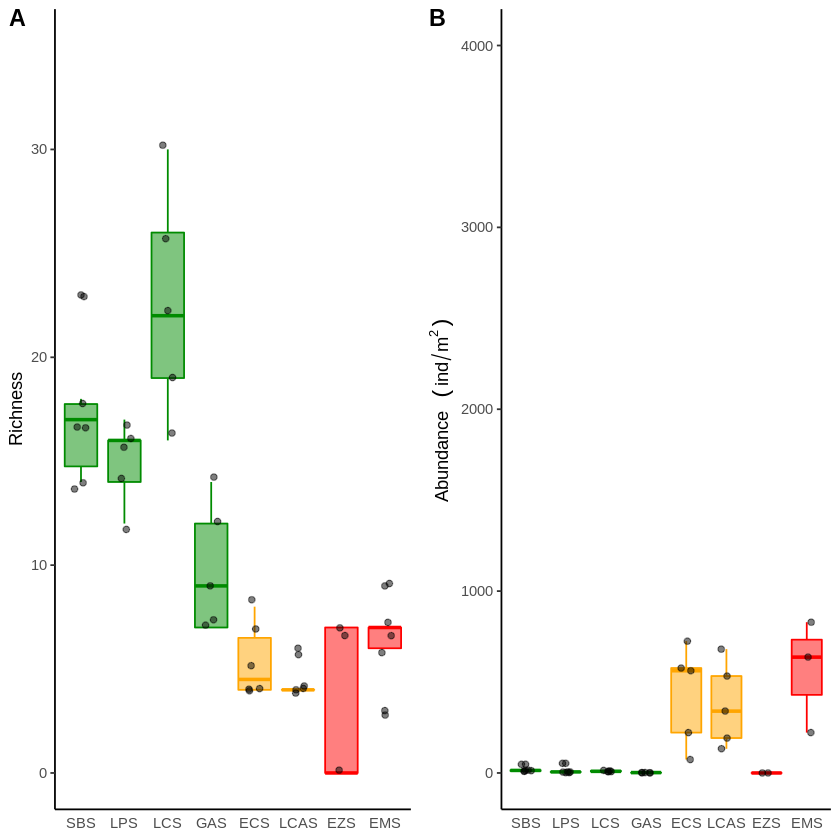

In [ ]:
riq_abund<-ggpubr::ggarrange(riqueza, abundancia, labels = c("A", "B"),ncol = 2, nrow=1)
riq_abund
ggsave(filename = "riq_abund.png", plot =riq_abund, width = 24, height = 12, dpi = 600, units = "cm")

##*Bivariate analysis* 
### Manhattan distance

In [ ]:
# Data input, total abundances per m2
mydata <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSZuTAHeOBvLUd84lJmoiveOLm3YopCWvJAVyrk7imIOfddul_yTEiMx5FXYuvCow/pub?gid=1729651634&single=true&output=csv", 
                    header=TRUE, sep=",", encoding = "Unicode", dec = ",")

In [ ]:
# Prepare the data for clustering
rownames <- mydata[,1] # Turn state names into observation IDs (labels)
mydata <- mydata[,2:73] # subset data set to just include the data you want to cluster
mydata <- na.omit(mydata) # listwise deletion of missing
mydata <- scale(mydata) # standardize variables
Data.scale<-attr(mydata, "scaled:scale")
Data.center <- attr(mydata, "scaled:center")

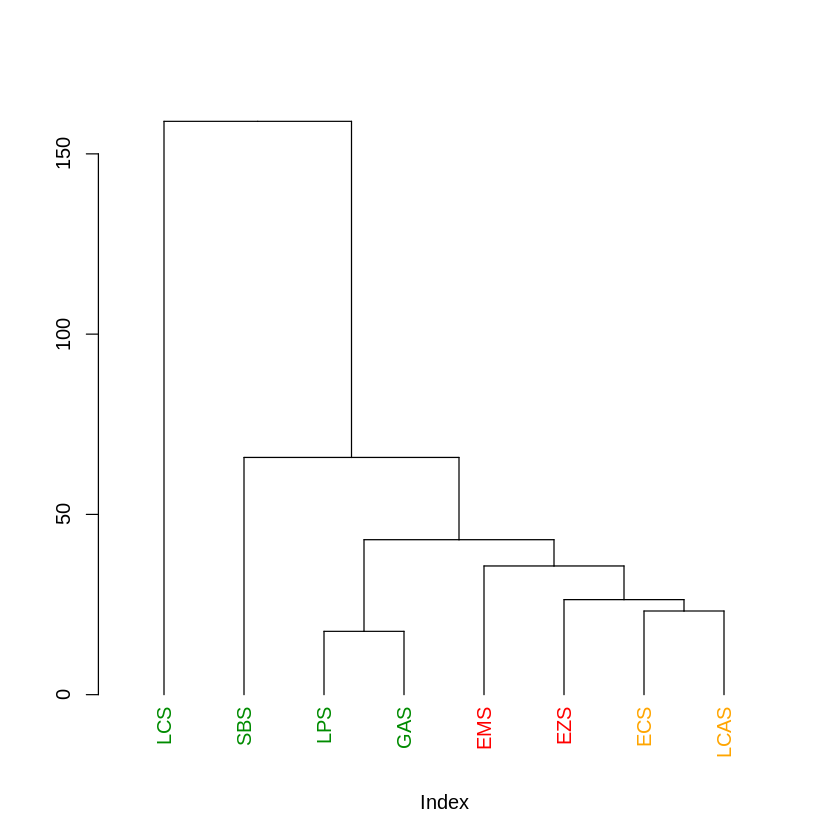

In [ ]:
# Hierarchical clustering
d <- dist(mydata, method="manhattan") # First, construct a distance matrix.
fit <- hclust(d, method = "ward.D2")  # Next, cluster
fit$labels <-rownames
fit <- color_labels(fit, 8, col = c ("green4","green4","green4","green4","red","red","orange","orange"))
plot(fit, main = NULL, xlab = NULL)

#Multivariate analysis
##NM-DS


In [ ]:
# Data input, nmds total abundances per m2
data <-read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSZuTAHeOBvLUd84lJmoiveOLm3YopCWvJAVyrk7imIOfddul_yTEiMx5FXYuvCow/pub?gid=591596968&single=true&output=csv", 
                header=TRUE, sep=",", encoding = "Unicode", dec = ",")

In [ ]:
#data selection
spp<-data[,5:76]
env<-data[,1:4]
rownames <- data[,1]

In [ ]:
#NMDS
nmds <- metaMDS (log1p (spp), distance = 'bray', scaling = 1)
plot(nmds, main = 'NMDS', type = 'n', display = 'si')
points (nmds, display = 'si', col = env$group, pch = env$group)
legend ('bottomleft', pch = 1:3, col = 1:3, legend = 1:3, title = '', cex = 0.6)


Call:
metaMDS(comm = log1p(spp), distance = "bray", scaling = 1) 

global Multidimensional Scaling using monoMDS

Data:     wisconsin(log1p(spp)) 
Distance: bray 

Dimensions: 2 
Stress:     9.442834e-05 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘wisconsin(log1p(spp))’ 


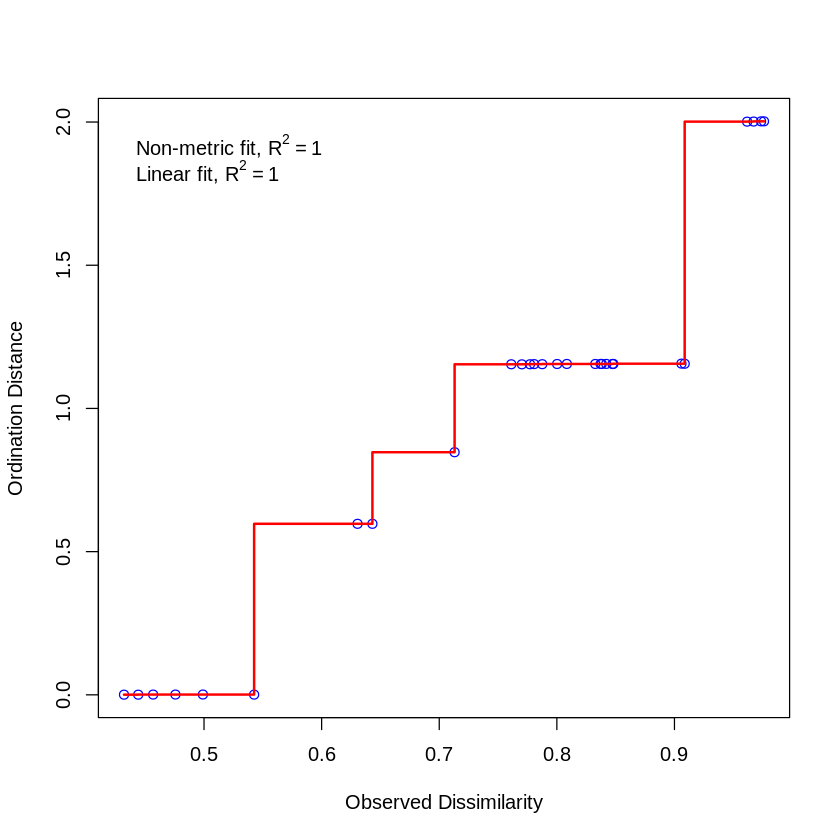

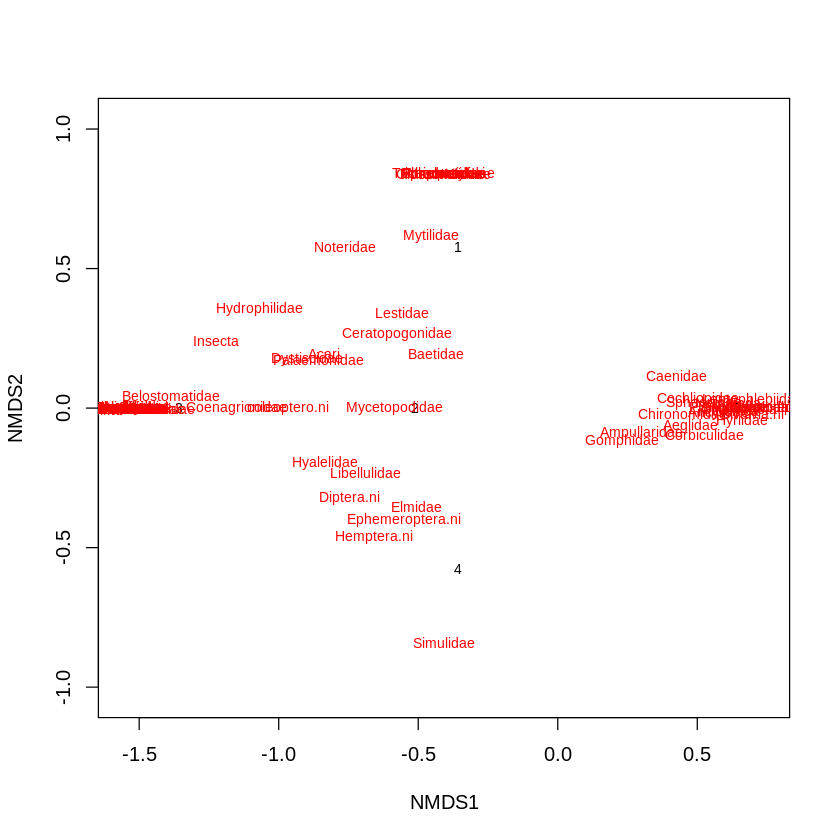

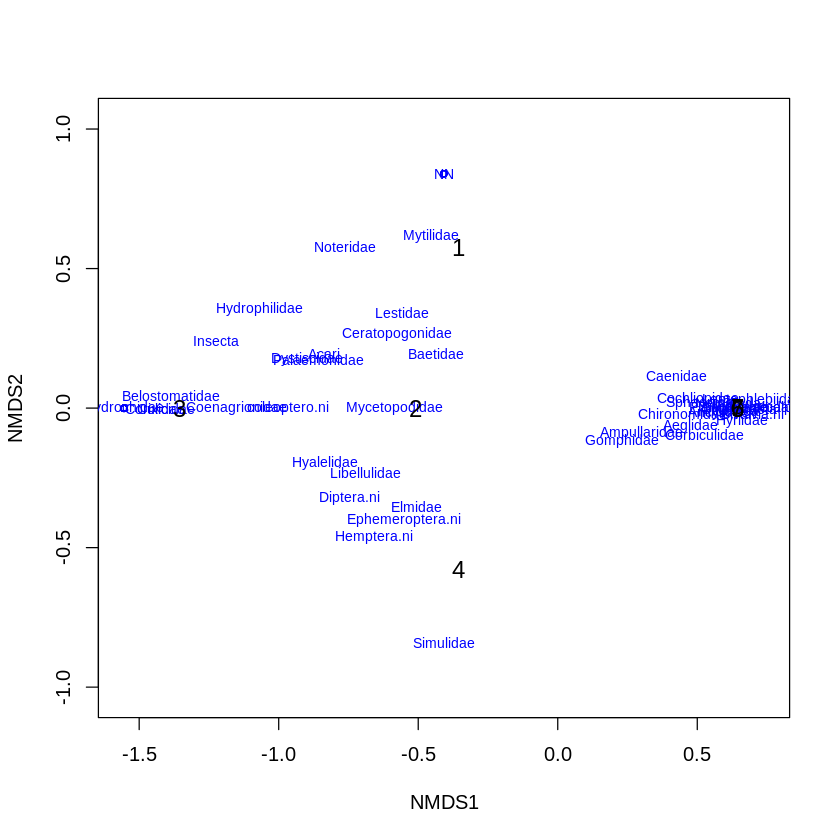

In [ ]:
### GRÁFICOS CON LOS RESULTADOS DEL NMDS
stressplot(nmds)
nmds
plot(nmds, type="t")
ordiplot(nmds,type="n")
orditorp(nmds,display="species",col="blue",air=0.01)
orditorp(nmds,display="sites",cex=1.2,air=0.01)

In [ ]:
##### GRÁFCO EN GGPLOT2
data.scores <- as.data.frame(scores(nmds))  #Using the scores function from vegan to extract the site scores and convert to a data.frame
data.scores$site <- data$stream  # create a column of site names, from the rownames of data.scores
data.scores$grp <- data$class #  add the grp variable created earlier
head(data.scores)  #look at the data
data.scores$grp1<-data$g

species.scores <- as.data.frame(scores(nmds, "species"))  #Using the scores function from vegan to extract the species scores and convert to a data.frame
species.scores$species <- rownames(species.scores)  # create a column of species, from the rownames of species.scores
head(species.scores)

grp.a <- data.scores[data.scores$grp1 == "A", ][chull(data.scores[data.scores$grp1 == 
                                                                   "A", c("NMDS1", "NMDS2")]), ]  # hull values for grp A
grp.b <- data.scores[data.scores$grp1 == "B", ][chull(data.scores[data.scores$grp1 == 
                                                                   "B", c("NMDS1", "NMDS2")]), ]  # hull values for grp B

hull.data <- rbind(grp.a, grp.b)  #combine grp.a and grp.b
hull.data

data.scores$grp<-factor(data.scores$grp, levels = c("Rural","Peri urban","Urban")) 

plot_nmds<-ggplot() + 
  geom_polygon(data=hull.data,aes(x=NMDS1,y=NMDS2,fill=grp1,group=grp1),alpha=0.30)+
    geom_point(data=data.scores,aes(x=NMDS1,y=NMDS2,shape=grp,colour=grp),size=4, check_overlap = TRUE)+ # add the point markers
  geom_text(data=species.scores,aes(x=NMDS1,y=NMDS2,label=species),alpha=0.3,size=2,check_overlap = TRUE) +  # add the species labels
   scale_colour_manual(values=c("Rural" = "darkgreen", "Peri urban" = "darkorange1","Urban"="orangered3"))+
  coord_equal() +
  theme_bw() + 
  geom_text(data=data.scores,aes(x=NMDS1,y=NMDS2,label=site),size=3,vjust=c(-0,-0,-0,-0,-1.5,-1.5,1.7,1.7),hjust=c(-0.3,-0.3,-0.3,-0.3,0.9,-0.2,0.9,-0.2)) +  # add the site labels
  theme(axis.text.x = element_blank(),  # remove x-axis text
 axis.text.y = element_blank(), # remove y-axis text
        axis.ticks = element_blank(),  # remove axis ticks
        axis.title.x = element_text(size=15), # remove x-axis labels
        axis.title.y = element_text(size=15), # remove y-axis labels
        panel.background = element_blank(), 
        panel.grid.major = element_blank(),  #remove major-grid labels
        panel.grid.minor = element_blank())+ #remove minor-grid labels
  theme(legend.title = element_blank())
plot_nmds

ggsave(filename = "nmds.png", plot =plot_nmds, width = 8, height = 4, dpi = 300, units = "in", pointsize=11)

In [ ]:
sp=as.data.frame(nmds$species[,1:2])*2
st=as.data.frame(nmds$points[,1:2])
grp=as.data.frame(data$stream)
grp1=as.data.frame(data$class)
colnames(grp)="group"
colnames(grp1)="group1"

grp$group<- factor(grp$group, levels = c("SBS","LPS","LCS","GAS","ECS","LCAS","EZS","EMS"))
grp1$group1<- factor(grp1$group1, levels = c("Rural","Peri urban","Urban"))



plot_nmds<-ggplot() +
  geom_point(data = st,aes(MDS1,MDS2,color=grp1$group1,shape=grp1$group1),size=5,alpha=c(0.8,0.8,0.8,0.8,0.8,0.8,0.5,0.5))+
  scale_colour_manual(values=c("Rural" = "green4","Peri urban"="orange","Urban"="red"))+
  scale_fill_manual(values=alpha(c("Rural" = "green4","Peri urban"="orange","Urban"="red"),0.3))+
  geom_text(data = sp,aes(MDS1,MDS2,label=row.names(sp)),size=4,check_overlap = TRUE, color="azure3")+
  geom_text(data=st,aes(x=MDS1,y=MDS2,label=data$stream),size=6,vjust=c(-0,-0,-0,-0,-1.5,-1.5,1.7,1.7),hjust=c(-0.3,-0.3,-0.3,-0.3,0.9,-0.2,0.9,-0.2)) +  # add the site labels
  theme_bw()+theme(panel.grid=element_blank())+
  xlab("NMDS1") +
  ylab("NMDS2") +
  theme(legend.title = element_blank())


plot_nmds

ggsave(filename = "plot_nmds", plot =plot_nmds, width = 12, height = 8, dpi = 300, units = "in", pointsize=11)


##MDA

In [ ]:
#data input, presences FFGs and substrate per stream
ACM_streams <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSZuTAHeOBvLUd84lJmoiveOLm3YopCWvJAVyrk7imIOfddul_yTEiMx5FXYuvCow/pub?gid=802876722&single=true&output=csv",
                        header=TRUE, sep=",", encoding = "Unicode", dec = ",")
summary(ACM_streams)

    stream           substrate              GC                 P            
 Length:99          Length:99          Length:99          Length:99         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      FC                 S                  Sh           
 Length:99          Length:99          Length:99         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

In [ ]:
#Convert to as factor
ACM_streams$stream <- as.factor(ACM_streams$stream)
ACM_streams$substrate <- as.factor(ACM_streams$substrate)
ACM_streams$GC <- as.factor(ACM_streams$GC)
ACM_streams$P <- as.factor(ACM_streams$P)
ACM_streams$FC <- as.factor(ACM_streams$FC)
ACM_streams$Sh <- as.factor(ACM_streams$Sh)
ACM_streams$S <- as.factor(ACM_streams$S)
summary(ACM_streams)

     stream     substrate    GC       P        FC       S        Sh    
 EMS    :15   om     :21   no :11   no :35   no :29   no :24   no :55  
 EZS    :15   sa     :18   yes:88   yes:64   yes:70   yes:75   yes:44  
 LCAS   :15   silt   :18                                               
 GAS    :12   s      :13                                               
 LCS    :12   cl     :10                                               
 SBS    :12   ss     : 9                                               
 (Other):18   (Other):10                                               

In [ ]:
#Perform to MCA
mca_streams<-MCA(ACM_streams)

ERROR: ignored

In [ ]:
#improve to MCA
p_mca <- fviz_mca_biplot(mca_streams, 
                col.ind = ACM_streams$stream, palette = "jco", alpha.ind = 1, 
                addEllipses = F, label = "var", cex= 2,
                col.var = "black", repel = TRUE, 
                title="",legend.title = "Streams") + theme_classic()
p_mca <- p_mca + scale_color_manual(values=c("orange","red","red","green4","orange","green4","green4","green4"))
p_mca
ggsave(filename = "mca.png", plot =p_mca, width = 20, height = 18, dpi = 300, units = "cm", pointsize=11)

ERROR: ignored